In [214]:
# Torch libraries to import
import torch

# Torch implementation of NN
import torch.nn as nn

# Torch autograd.
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt
import seaborn

# Blackbox optimization
import torch.optim as optim
%matplotlib inline

In [117]:
# Create some data.
# 1000 data points. U[(-1, -1), (1,1)]
X = np.random.random([1000,2]) * 2 - 1.0

# Label points within a circle.
y = np.array([0 if np.linalg.norm(X[i]) > 0.75 else 1 for i in range(X.shape[0])])

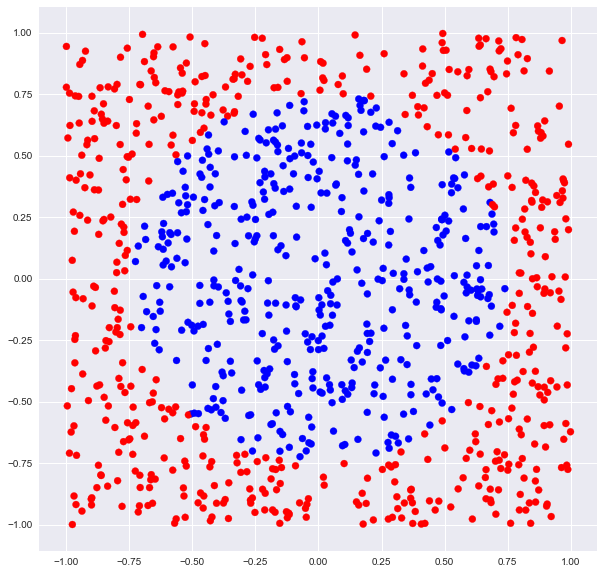

In [215]:
plt.figure(figsize=(10,10))
plt.scatter(x =X[:, 0], y = X[:, 1], color=["blue" if c == 1 else "red" for c in y] )

In [226]:

def make_model(layers, width):
    model = nn.Sequential()
    model.add_module("layer1", nn.Linear(2, 10))
    model.add_module("act", nn.ReLU())
    #model.add_module("layer2", nn.Linear(10, 10))
    #model.add_module("act2", nn.Tanh())
    model.add_module("layer3", nn.Linear(10, 2))
    model.add_module("softmax", nn.LogSoftmax())
    return model

def run_batch(model, x):
    "Take a minibatch of examples, and compute probability of classes"
    x = Variable(torch.from_numpy(x).float(), requires_grad=True)
    return model.forward(x)

def train(model, val):
    # Use NLL (cross-entropy loss)
    criterion = nn.NLLLoss(size_average=True)

    # Compute gradient, change weights (SGD)
    opt = optim.SGD(model.parameters(), lr=1)

    # Run training
    vals = []
    for epoch in range(100):
        total_loss = 0
        
        # Iterate through minibatches
        for i in range(0, X.shape[0], 100):

            # Zero our parameter gradients 
            opt.zero_grad()

            # Create and example and compute loss
            x = Variable(torch.from_numpy(X[i:i+10]).float(), requires_grad=True)
            output = model.forward(x)

            # Computes the loss
            targets = Variable(torch.from_numpy(y[i:i+10]).long())
            loss = criterion.forward(output, targets)
            total_loss += loss

            # computes the gradient and updates the parameters
            loss.backward()
            opt.step()
        #print(epoch, total_loss[0])

        # Compute where it put each points
        scores = run_batch(model,  val)
        argmax = (scores[:, 0].data > scores[:,1].data)

        # Save for epoch
        vals.append(argmax)
    return vals

In [227]:
# Here I make a grid over -1, -1 -> 1,1
xp = np.linspace(-1, 1, 100)
yp = np.linspace(-1, 1, 100)
xp, yp = np.meshgrid(xp, yp)
val = np.hstack([xp.reshape(-1, 1), yp.reshape(-1, 1)] )

# Train the model
model = make_model(1, 20)
out = train(model, val)

In [228]:
from ipywidgets import interact, interactive, fixed, interact_manual

def show(epoch = 0):
    plt.figure(figsize=(10,10))
    plt.scatter(val[:, 0], val[:, 1],  
            color=["green" if out[epoch][j] == 0 else "orange"  for j in range(out[epoch].size(0))])
    plt.scatter(x =X[:, 0], y = X[:, 1], color=["blue" if c == 1 else "red" for c in y] )
interactive(show, epoch=(0, 100, 5))

A Jupyter Widget